In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/flight-delay-prediction/Jan_2019_ontime.csv
/kaggle/input/flight-delay-prediction/Jan_2020_ontime.csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
filepath1 = os.path.join(dirname, filenames[0])
filepath2 = os.path.join(dirname, filenames[1])
df1 = pd.read_csv(filepath1)
df2 = pd.read_csv(filepath1)
print(df1.shape)
print(df2.shape)
df = pd.concat([df1, df2], ignore_index=True)

(583985, 22)
(583985, 22)


In [4]:
df.head(10)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
5,1,2,9E,20363,9E,N927EV,3285,11267,1126702,DAY,...,MSP,853.0,0.0,0900-0959,953.0,0.0,0.0,0.0,574.0,NaN
6,1,2,9E,20363,9E,N915XJ,3286,12448,1244807,JAN,...,ATL,1553.0,0.0,1500-1559,1832.0,0.0,0.0,0.0,341.0,NaN
7,1,2,9E,20363,9E,N295PQ,3287,12953,1295304,LGA,...,CVG,1551.0,0.0,1500-1559,1824.0,0.0,0.0,0.0,585.0,NaN
8,1,2,9E,20363,9E,N337PQ,3288,12451,1245102,JAX,...,LGA,1037.0,0.0,1000-1059,1239.0,0.0,0.0,0.0,833.0,NaN
9,1,2,9E,20363,9E,N311PQ,3289,10397,1039707,ATL,...,BMI,1245.0,0.0,1200-1259,1318.0,0.0,0.0,0.0,533.0,NaN


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DAY_OF_MONTH,1167970.0,1.596009e+01,8.987938,1.0,8.0,16.0,24.0,31.0
DAY_OF_WEEK,1167970.0,3.835626e+00,1.921898,1.0,2.0,4.0,5.0,7.0
OP_CARRIER_AIRLINE_ID,1167970.0,1.998321e+04,377.724476,19393.0,19790.0,19977.0,20368.0,20452.0
OP_CARRIER_FL_NUM,1167970.0,2.537869e+03,1821.735365,1.0,979.0,2114.0,3902.0,7439.0
ORIGIN_AIRPORT_ID,1167970.0,1.265970e+04,1519.404843,10135.0,11292.0,12889.0,13931.0,16218.0
ORIGIN_AIRPORT_SEQ_ID,1167970.0,1.265974e+06,151940.234869,1013505.0,1129202.0,1288903.0,1393102.0,1621802.0
DEST_AIRPORT_ID,1167970.0,1.265947e+04,1519.335815,10135.0,11292.0,12889.0,13931.0,16218.0
DEST_AIRPORT_SEQ_ID,1167970.0,1.265951e+06,151933.332059,1013505.0,1129202.0,1288903.0,1393102.0,1621802.0
DEP_TIME,1135266.0,1.331958e+03,495.403802,1.0,921.0,1328.0,1738.0,2400.0
DEP_DEL15,1135260.0,1.742808e-01,0.379351,0.0,0.0,0.0,0.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167970 entries, 0 to 1167969
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DAY_OF_MONTH           1167970 non-null  int64  
 1   DAY_OF_WEEK            1167970 non-null  int64  
 2   OP_UNIQUE_CARRIER      1167970 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  1167970 non-null  int64  
 4   OP_CARRIER             1167970 non-null  object 
 5   TAIL_NUM               1162884 non-null  object 
 6   OP_CARRIER_FL_NUM      1167970 non-null  int64  
 7   ORIGIN_AIRPORT_ID      1167970 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  1167970 non-null  int64  
 9   ORIGIN                 1167970 non-null  object 
 10  DEST_AIRPORT_ID        1167970 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    1167970 non-null  int64  
 12  DEST                   1167970 non-null  object 
 13  DEP_TIME               1135266 non-null  float64
 14  DEP_DEL15         

In [7]:
import plotly.graph_objects as go

fig = go.Figure()
df_corr=df.corr().T
fig.add_trace(
    go.Heatmap(
        x = df_corr.index,
        y = df_corr.columns,
        z = np.array(df_corr),
        text=df_corr.values,
        texttemplate='%{text:.2f}'
    )
)
fig.show()

In [8]:
column1 = ['DAY_OF_MONTH', 'DAY_OF_WEEK','OP_CARRIER_AIRLINE_ID','OP_CARRIER', 'TAIL_NUM','OP_CARRIER_FL_NUM',
 'DEST','DEP_TIME','DEP_DEL15', 'ARR_TIME', 'ARR_DEL15', 'DISTANCE']

df = df[column1]

# Drops rows with na values from dataframe.
df.dropna(inplace=True)

In [9]:
df.corr(method = 'pearson')

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,DISTANCE
DAY_OF_MONTH,1.000000,-0.021999,-0.001235,-0.012975,-0.001515,0.027762,0.003527,0.038639,-0.016014
DAY_OF_WEEK,-0.021999,1.000000,0.005142,0.059897,0.003763,-0.003089,0.005355,-0.000655,0.017024
OP_CARRIER_AIRLINE_ID,-0.001235,0.005142,1.000000,0.444965,0.005790,0.041485,-0.019409,0.079238,-0.125062
OP_CARRIER_FL_NUM,-0.012975,0.059897,0.444965,1.000000,0.008770,0.026191,0.004511,0.038640,-0.342549
DEP_TIME,-0.001515,0.003763,0.005790,0.008770,1.000000,0.190526,0.672891,0.143283,-0.026949
DEP_DEL15,0.027762,-0.003089,0.041485,0.026191,0.190526,1.000000,0.088508,0.719430,0.011393
ARR_TIME,0.003527,0.005355,-0.019409,0.004511,0.672891,0.088508,1.000000,0.062031,0.020906
ARR_DEL15,0.038639,-0.000655,0.079238,0.038640,0.143283,0.719430,0.062031,1.000000,0.003407
DISTANCE,-0.016014,0.017024,-0.125062,-0.342549,-0.026949,0.011393,0.020906,0.003407,1.000000


In [10]:
fig.write_html("Corr.html")

In [11]:
df['DAY_OF_WEEK'].value_counts()

4    192946
3    186686
2    179364
5    157308
1    153610
7    141720
6    120292
Name: DAY_OF_WEEK, dtype: int64

In [12]:
df3 = pd.DataFrame({'Ind':[1,2,3,4,5,6,7],'Days':['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']})
df3.set_index("Ind",inplace=True)
df2 = df[['DAY_OF_WEEK', 'ARR_DEL15']]
df2 = df2.groupby(['DAY_OF_WEEK']).sum()
df2 = df2.sort_values(by=['ARR_DEL15'], ascending=False)
df2.columns = ['Number of Flight Delays']
df2 = pd.merge(df2, df3, left_index=True, right_index=True)
df2

,Number of Flight Delays,Days
4,40498.0,Thursday
3,36164.0,Wednesday
2,30118.0,Tuesday
5,28860.0,Friday
1,28700.0,Monday
7,26820.0,Sunday
6,19284.0,Saturday


In [13]:
import plotly.express as px
fig = px.bar(df2, x='Days', y='Number of Flight Delays',color='Number of Flight Delays',
            text_auto = True,labels = {'DAY_OF_WEEK':'DAY OF WEEK'})
fig.update_traces(textposition="outside")
fig.show()

In [14]:
del(df2)

In [15]:
df['DAY_OF_MONTH'].value_counts()

2     40340
7     39702
11    39654
25    39652
10    39512
17    39426
14    39322
18    39068
24    39006
4     38934
3     38682
6     38192
9     38090
21    37716
16    37512
8     37158
23    36916
28    36870
15    36764
27    36644
31    36320
1     35688
13    35558
29    34964
22    34790
30    33828
5     33286
20    31326
26    30356
12    29886
19    26764
Name: DAY_OF_MONTH, dtype: int64

In [16]:
df2 = df[['DAY_OF_MONTH', 'ARR_DEL15']]
df2 = df2.groupby(['DAY_OF_MONTH']).sum()
df2 = df2.sort_values(by=['ARR_DEL15'], ascending=False)
df2.columns = ['Number of Flight Delays']
df2

,Number of Flight Delays
DAY_OF_MONTH,
24,12168.0
2,10406.0
21,10146.0
23,10074.0
25,8988.0
18,8556.0
17,7894.0
22,7858.0
1,7688.0


In [17]:
fig = px.bar(df2, x=df2.index, y='Number of Flight Delays',color='Number of Flight Delays',text_auto=True)
fig.update_traces(textposition="outside", cliponaxis=False)
fig.show()

In [18]:
df['OP_CARRIER'].value_counts()

WN    214470
AA    150708
DL    146806
OO    123540
UA     92252
YX     49138
MQ     47420
B6     46790
OH     44738
AS     40408
9E     39642
YV     35658
NK     30018
EV     24400
F9     18980
HA     13570
G4     13388
Name: OP_CARRIER, dtype: int64

In [19]:
df2 = df[['OP_CARRIER', 'ARR_DEL15']]
df2 = df2.groupby(['OP_CARRIER']).sum()
df2 = df2.sort_values(by=['ARR_DEL15'], ascending=False)
df2.columns = ['Number of Flight Delays']
df2

,Number of Flight Delays
OP_CARRIER,
WN,32222.0
OO,28048.0
AA,27482.0
DL,18806.0
UA,18312.0
B6,12858.0
YX,11728.0
MQ,11688.0
9E,8026.0


In [20]:
import plotly.express as px
fig = px.bar(df2, x=df2.index, y='Number of Flight Delays',labels={'OP_CARRIER':'Airline ID','WN':'Southwest Airlines'},
            text_auto=True,color = 'Number of Flight Delays')
fig.update_traces(textposition="outside")
fig.show()

In [21]:
import plotly.express as px

fig = px.scatter(df2, x='Number of Flight Delays',color=df2.index)
fig.show()

In [22]:
fig = px.pie(
    df2, values='Number of Flight Delays', names=df2.index,
    hole=0.5
)
fig.update_layout(height=500, title='Flight Delays by Airline Companies')
fig.show()
del(df2)

fig.write_html("Pie.html")

In [23]:
df2 = df[['DEST', 'ARR_DEL15']]
df2 = df2.groupby(['DEST']).sum()
df2 = df2.sort_values(by=['ARR_DEL15'], ascending=False)
df2.columns = ['Destination Flight Delays']
df2

,Destination Flight Delays
DEST,
ORD,12882.0
LGA,9672.0
DFW,8564.0
ATL,7862.0
SFO,7284.0
...,...
CPR,6.0
STC,4.0
PPG,4.0


**Picking relevant columns**

I want do drop some columns from the data frame as many columns are redundant. Here are some of the columns/notes

'OP_UNIQUE_CARRIER' and 'OP_CARRIER' are redundant were eliminated.
'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID' are redundant and mean the same thing, used Origin instead.
'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID' are redundant used 'DEST' insead
Did not use 'DEP_TIME_BLK', instead rounded the departure times and arrival times down in a further section.
'Unnamed: 21' not used and removed

In [24]:
column1 = ['DAY_OF_MONTH','DAY_OF_WEEK','OP_CARRIER_AIRLINE_ID', 'TAIL_NUM','OP_CARRIER_FL_NUM',
 'DEST','DEP_TIME','DEP_DEL15', 'ARR_TIME', 'ARR_DEL15', 'DISTANCE']

df = df[column1]

# Drops rows with na values from dataframe.
df.dropna(inplace=True)

In [25]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,DEST,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,DISTANCE
0,1,2,20363,N8688C,3280,ATL,601.0,0.0,722.0,0.0,300.0
1,1,2,20363,N348PQ,3281,CVG,1359.0,0.0,1633.0,0.0,596.0
2,1,2,20363,N8896A,3282,CVG,1215.0,0.0,1329.0,0.0,229.0
3,1,2,20363,N8886A,3283,ATL,1521.0,0.0,1625.0,0.0,223.0
4,1,2,20363,N8974C,3284,FSM,1847.0,0.0,1940.0,0.0,579.0


In [26]:
df.shape

(1131926, 11)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131926 entries, 0 to 1167969
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DAY_OF_MONTH           1131926 non-null  int64  
 1   DAY_OF_WEEK            1131926 non-null  int64  
 2   OP_CARRIER_AIRLINE_ID  1131926 non-null  int64  
 3   TAIL_NUM               1131926 non-null  object 
 4   OP_CARRIER_FL_NUM      1131926 non-null  int64  
 5   DEST                   1131926 non-null  object 
 6   DEP_TIME               1131926 non-null  float64
 7   DEP_DEL15              1131926 non-null  float64
 8   ARR_TIME               1131926 non-null  float64
 9   ARR_DEL15              1131926 non-null  float64
 10  DISTANCE               1131926 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 103.6+ MB


In [28]:
df['ARR_DEL15'].value_counts()

0.0    921482
1.0    210444
Name: ARR_DEL15, dtype: int64

In [29]:
import plotly.graph_objects as go
y = df['ARR_DEL15'].value_counts().values
fig = go.Figure(data=[go.Bar(
            x = df['ARR_DEL15'].value_counts().index.values,
            y = df['ARR_DEL15'].value_counts().values,
            text=y
        )])
fig.update_layout(title_text='Target variable distribution')
fig.show()

Data set has a slight class imbalance, as there are less delays than not delays, however I think a model can still run and predict well.

## Encoding for Column Tail Number
I assume TAIL_Num is the number to label a plane. I wanted to break down planes based on the amount of delays they had.

In [30]:
df2 = df[['TAIL_NUM', 'ARR_DEL15']]
df2 = df2.groupby(['TAIL_NUM']).sum()
df2 = df2.sort_values(by=['ARR_DEL15'], ascending=False)
df2.columns = ['tail_delay']

In [31]:
df2.head(10)

,tail_delay
TAIL_NUM,
N679SA,144.0
N758EV,144.0
N954SW,138.0
N818MD,130.0
N910SW,128.0
N904EV,126.0
N642RW,124.0
N708SK,120.0
N709SK,120.0


In [32]:
import plotly.express as px

fig = px.histogram(df2, x='tail_delay', nbins=10, text_auto=True,title = 'Histogram of Flight Delays',
                  labels={'tail_delay':'Number of Flights Delays'})
fig.show()

In [33]:
## Converts TAIL_NUM into a category from 1-6 based on the amount of delays the plane has
df2['tail_delay'] = np.floor(df2['tail_delay']/20)
df = pd.merge(df, df2, on='TAIL_NUM')
del(df2)
df.drop(columns = ['TAIL_NUM'], inplace=True)

## rounds departure time down to the nearest hour. Example 6:15 or 6:45 would be both be rounded to 6.
df['DEP_TIME'] = round((df['DEP_TIME']/100), 0)
df['DEP_TIME']  = df['DEP_TIME'].astype(int)
df['ARR_TIME'] = round((df['ARR_TIME']/100), 0)
df['ARR_TIME']  = df['ARR_TIME'].astype(int) 

In [34]:
column = 'DEST'
df2 = df[[column, 'ARR_DEL15']]
df2 = df2.groupby(column).sum()
df2 = df2.sort_values(by=['ARR_DEL15'], ascending=False)
df2.columns = ['city_delay']
df2

,city_delay
DEST,
ORD,12882.0
LGA,9672.0
DFW,8564.0
ATL,7862.0
SFO,7284.0
...,...
CPR,6.0
STC,4.0
PPG,4.0


In [35]:
import plotly.express as px

fig = px.histogram(df2, x='city_delay', nbins=10, text_auto=True,title = 'Histogram of Flight Delays based on Destination Airport',
                  labels={'city_delay':'Number of Flight Delays based on Destination'})
fig.show()

In [36]:
df2

,city_delay
DEST,
ORD,12882.0
LGA,9672.0
DFW,8564.0
ATL,7862.0
SFO,7284.0
...,...
CPR,6.0
STC,4.0
PPG,4.0


In [37]:
df2['city_delay'] = np.floor(df2['city_delay']/1000)
df = pd.merge(df, df2, on=column)
del(df2)
df.drop(columns = column, inplace=True)

In [38]:
df.head(10)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,DISTANCE,tail_delay,city_delay
0,1,2,20363,3280,6,0.0,7,0.0,300.0,2.0,7.0
1,1,2,20363,3442,10,0.0,13,0.0,500.0,2.0,7.0
2,2,3,20363,5110,17,0.0,18,0.0,153.0,2.0,7.0
3,2,3,20363,3307,14,0.0,15,0.0,192.0,2.0,7.0
4,2,3,20363,3371,6,0.0,7,0.0,83.0,2.0,7.0
5,2,3,20363,3391,10,0.0,11,0.0,377.0,2.0,7.0
6,3,4,20363,3368,14,0.0,17,0.0,500.0,2.0,7.0
7,3,4,20363,3407,11,0.0,12,0.0,223.0,2.0,7.0
8,3,4,20363,5185,19,0.0,20,0.0,164.0,2.0,7.0
9,3,4,20363,5308,6,0.0,8,0.0,241.0,2.0,7.0


## One Hot Encoding Code
The column 'OP_CARRIER_AIRLINE_ID' is a categorical columns. I chose to use one hot encoding to convert the columns in a usable format. Label encoding assigns a number value to each value in the column. For example one airline ID '20363' would have a value of 1 and airline id '19805' would have a value of 2. However the issue is that the model may infer a numerical relationship between these values so it is easier to use One Hot Encoding to convert each variable into a feature/column. column2 is a list containing the names of all the columns to convert using one hot encoding.

In [39]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

column2 = ['OP_CARRIER_AIRLINE_ID', 'tail_delay', 'city_delay']

for col in column2:
    enc = OneHotEncoder(sparse = False, handle_unknown='ignore')
    encoded_frame = enc.fit_transform(np.array(df[col]).reshape(-1,1))
    column_name = enc.get_feature_names()
    column_name = col + column_name
    one_hot_encoded_frame =  pd.DataFrame(encoded_frame, columns= column_name)
    
    df = pd.concat([df, one_hot_encoded_frame], axis=1)
    del(encoded_frame)
    del(one_hot_encoded_frame)
    df.drop(columns = col, inplace=True)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131926 entries, 0 to 1131925
Data columns (total 44 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   DAY_OF_MONTH                   1131926 non-null  int64  
 1   DAY_OF_WEEK                    1131926 non-null  int64  
 2   OP_CARRIER_FL_NUM              1131926 non-null  int64  
 3   DEP_TIME                       1131926 non-null  int64  
 4   DEP_DEL15                      1131926 non-null  float64
 5   ARR_TIME                       1131926 non-null  int64  
 6   ARR_DEL15                      1131926 non-null  float64
 7   DISTANCE                       1131926 non-null  float64
 8   OP_CARRIER_AIRLINE_IDx0_19393  1131926 non-null  float64
 9   OP_CARRIER_AIRLINE_IDx0_19690  1131926 non-null  float64
 10  OP_CARRIER_AIRLINE_IDx0_19790  1131926 non-null  float64
 11  OP_CARRIER_AIRLINE_IDx0_19805  1131926 non-null  float64
 12  OP_CARRIER_AIR

In [41]:
from sklearn.model_selection import train_test_split

X = df.drop(['ARR_DEL15'], axis=1)
y = df['ARR_DEL15']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)


In [42]:
import plotly.graph_objects as go
data = [go.Bar(
            x = y_train.value_counts().index.values,
            y = y_train.value_counts().values,
            text='Distribution of target variable'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [43]:
print(X_train.shape, X_test.shape)

(905540, 43) (226386, 43)


In [44]:
print(y_train.shape, y_test.shape)

(905540,) (226386,)


In [45]:
y_train.value_counts()

0.0    737211
1.0    168329
Name: ARR_DEL15, dtype: int64

In [46]:
# Training the data
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=0)

In [47]:
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 974.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=58518f529ee5b87fec3f0aa19e9da8d5aa781c2c505635c80b36933498a2f297
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [48]:
from sklearn.tree import export_graphviz
from sklearn import tree
from six import StringIO  
import pydotplus
from IPython.display import Image 
dot_data = StringIO()
from sklearn import tree

tree.export_graphviz(clf, max_depth = 3, feature_names=X_test.columns, out_file= dot_data,filled = True,
                    rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('tree.png')

True

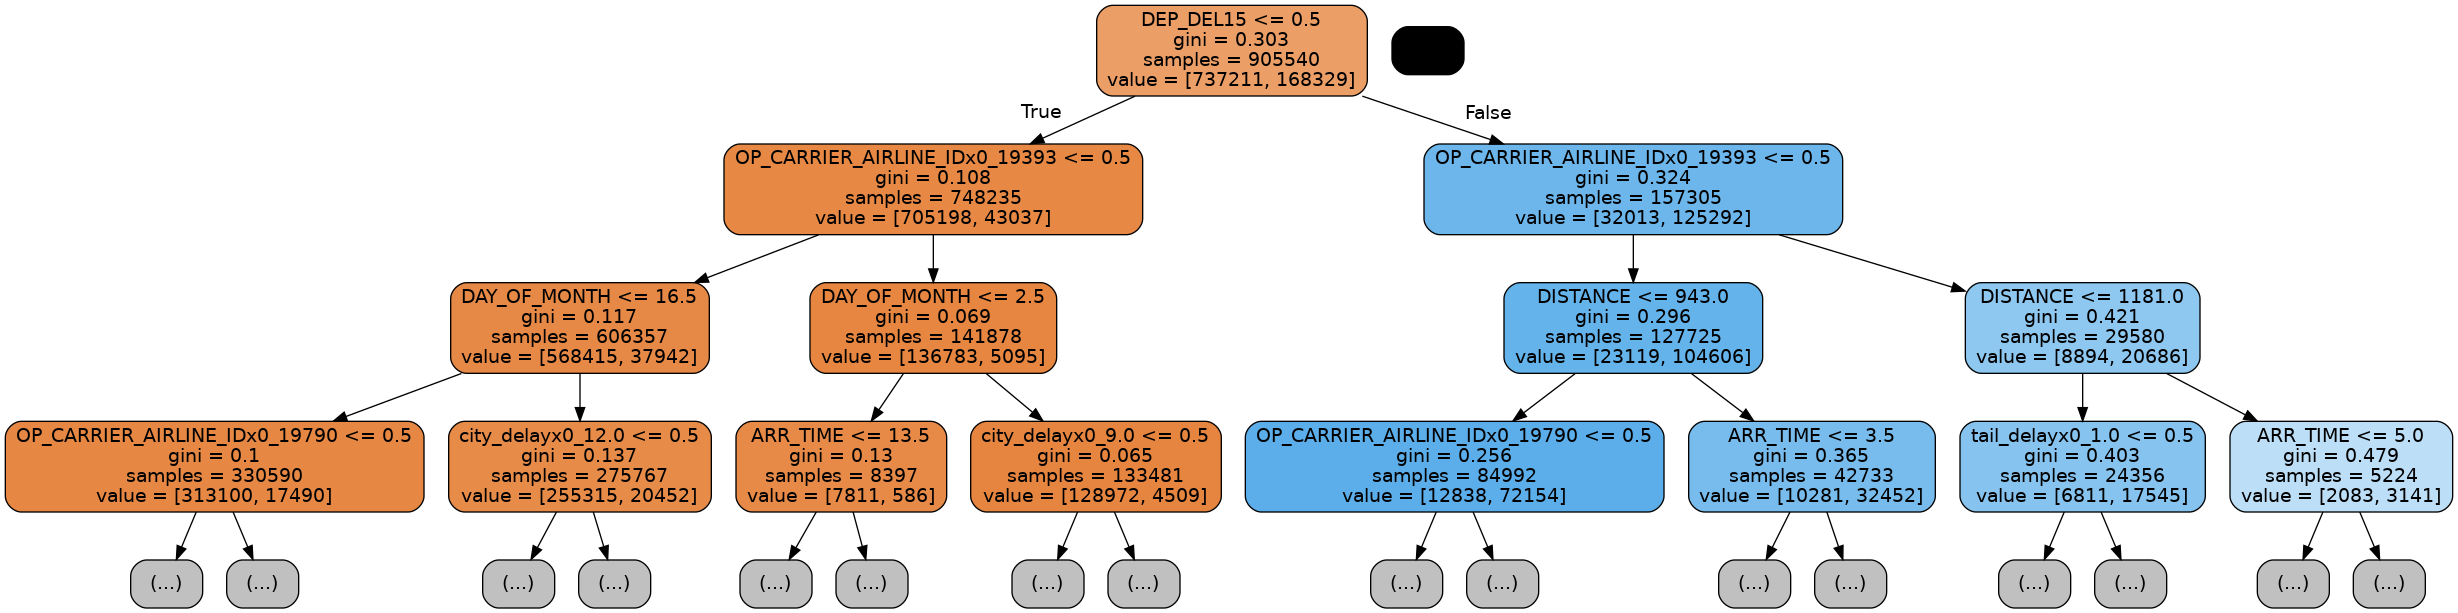

In [49]:
Image(graph.create_png())

In [50]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
y_predict = clf.predict(X_test)
cmatrix = confusion_matrix(y_test, y_predict) 
accuracy = accuracy_score(y_test, y_predict) 
classification_report = classification_report(y_test, y_predict) 

print(classification_report)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    184271
         1.0       0.93      0.93      0.93     42115

    accuracy                           0.97    226386
   macro avg       0.96      0.96      0.96    226386
weighted avg       0.97      0.97      0.97    226386



In [51]:
# Confusion Matrix
import plotly.figure_factory as ff
z = cmatrix
x = ["0 (Not Delayed)","1 (Delayed)"]
y = ["0 (Not Delayed)","1 (Delayed)"]
z_text = [[str(y) for y in x] for x in z]

# set up figure 
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=1.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.15,
                        y=0.5,
                        showarrow=False,
                        text="True value",
                        textangle = -90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=100, l=250))
# add colorbar
fig['data'][0]['showscale'] = True
fig.show()


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.



In [52]:
fig.write_html("Cmatrix.html")

In [53]:
tp = cmatrix[1,1]
fn = cmatrix[1,0]
fp = cmatrix[0,1]
tn = cmatrix[0,0]
Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
Precision =  (tp/(tp+fp))
Recall    =  (tp/(tp+fn))
F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
show_metrics = show_metrics.T

colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']


fig = go.Figure(data=go.Bar(x = (show_metrics[0].values), 
               y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                textposition = 'auto',
               orientation = 'h', opacity = 0.8,marker=dict(color=colors,line=dict(color='#000000',width=1.5))))
fig.show()

In [54]:
#Print Train Accuracy
dt_train_accuracy = clf.score(X_train,y_train)
print("dt_train_accuracy = ",clf.score(X_train,y_train))
#Print Test Accuracy
dt_test_accuracy = clf.score(X_test,y_test)
print("dt_test_accuracy = ",clf.score(X_test,y_test))

dt_train_accuracy =  1.0
dt_test_accuracy =  0.9734435875009939


In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

probs = clf.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)

AUC: 0.96


## ROC Curve
Reciever Operator Curves are a good way to illustrate a classification model, and plots the true positive rate against the false positive rate. The closer the graph is to the top and left-hand borders, the more accurate the test. The output was not the probabilities beween 0 and 1, so the ROC curvve isn't as smooth as compared to other models.

In [56]:
import plotly.express as px

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [57]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_predict)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

In [58]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

DEP_DEL15                        0.517949
OP_CARRIER_FL_NUM                0.108638
DISTANCE                         0.094156
DAY_OF_MONTH                     0.049591
ARR_TIME                         0.048364
DEP_TIME                         0.040971
DAY_OF_WEEK                      0.036142
tail_delayx0_2.0                 0.007382
city_delayx0_1.0                 0.006378
city_delayx0_0.0                 0.005958
tail_delayx0_3.0                 0.005911
tail_delayx0_1.0                 0.005639
city_delayx0_4.0                 0.005584
city_delayx0_2.0                 0.005184
city_delayx0_6.0                 0.004054
tail_delayx0_4.0                 0.003806
city_delayx0_7.0                 0.003774
city_delayx0_3.0                 0.003747
OP_CARRIER_AIRLINE_IDx0_19805    0.003660
OP_CARRIER_AIRLINE_IDx0_19393    0.003106
tail_delayx0_0.0                 0.003092
city_delayx0_5.0                 0.002753
OP_CARRIER_AIRLINE_IDx0_19977    0.002697
OP_CARRIER_AIRLINE_IDx0_19790    0

In [59]:
# Important Features
fig = px.bar(feature_imp.nlargest(6),text_auto = True,labels = {'index':'Features'})
fig.show()

You could get higher accuracy using Random Forest models and boosted tree algorithms> However Decision Tree algorithms are a good way to start to visualize and interpret which variables that are important.